# 0. Stock Trading with Deep Reinforcement Learning

## 1. Install the Required Packages
- **Description**: This section outlines the necessary packages required to run the project.
- **Instructions**:
  - List the packages such as `gymnasium`, `numpy`, `pandas`, `matplotlib`, and `stable-baselines3`.
  - Provide commands to install the packages using `pip`.

## 2. Download the Dow Jones 30 Stocks Data
- **Description**: This section explains how to download the data for the Dow Jones 30 stocks.
- **Instructions**:
  - Provide a brief overview of the data source.
  - Explain how to download the data and save it in a suitable format (e.g., CSV files).

## 3. Load the Data from the CSV Files
- **Description**: This section covers loading the downloaded data into the environment.
- **Instructions**:
  - Describe how to read the CSV files using `pandas`.
  - Mention any necessary preprocessing steps required before using the data.

## 4. Add Technical Indicators to the Data
- **Description**: This section focuses on enhancing the data by adding technical indicators.
- **Instructions**:
  - List the technical indicators used (e.g., Moving Averages, RSI, MACD).
  - Explain how to calculate and add these indicators to the data.

## 5. Create Trading Environment
- **Description**: This section details the creation of the custom trading environment (`StockTradingEnv`).
- **Instructions**:
  - Describe the observation space and action space.
  - Include information on how transaction costs are simulated.
  - Highlight any specific attributes or methods used in the environment setup.

## 6. Training Model - Ensemble + PPO + A2C + DDPG + SAC + TD3
- **Description**: This section explains the training process for various DRL agents.
- **Instructions**:
  - List the DRL agents used for training (e.g., PPO, A2C, DDPG, SAC, TD3).
  - Describe the training configuration and hyperparameters.
  - Explain how to train the agents on the custom trading environment.

## 7. Testing Model - Ensemble + PPO + A2C + DDPG
- **Description**: This section covers the testing and evaluation of the trained DRL agents.
- **Instructions**:
  - Describe how to test the performance of the trained agents.
  - Mention the evaluation metrics used (e.g., return, volatility, Sharpe ratio).
  - Explain how to visualize and interpret the results.

## Research Paper
This project was inspired by the research paper ["Deep Reinforcement Learning for Automated Stock Trading"](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3690996). The paper provides a comprehensive overview of using DRL in financial markets and guided the development of the agents and environment in this project.

# 1. install the required packages

In [1]:
# 1. install the required packages
!pip install yfinance stable-baselines3 gym pandas matplotlib
 

^C


  Using cached yfinance-0.2.40-py2.py3-none-any.whl.metadata (11 kB)
  Using cached gym-0.26.2.tar.gz (721 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached peewee-3.17.5.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached beautifulsoup4-4.12.3-py3-none-any

# 2. Download the dow jones 30 stocks data

[*********************100%%**********************]  1 of 1 completed


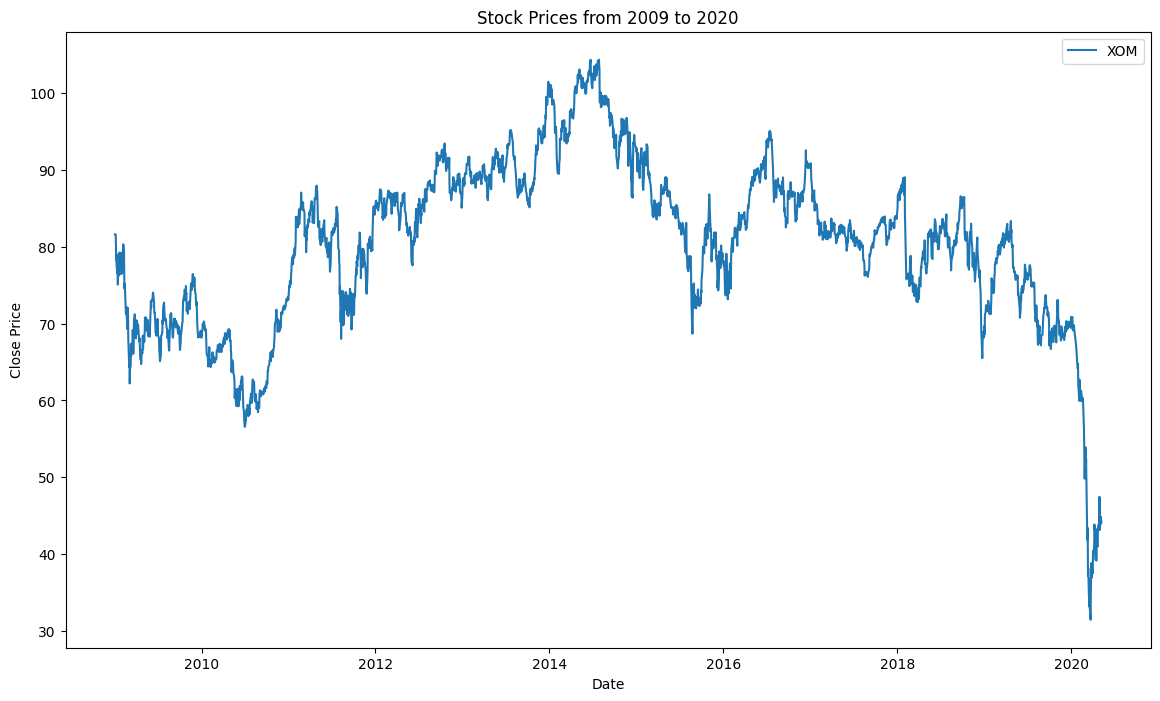

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Bullish Stock in profit
tickers = [
    'MKTX',"ABMD","NFLX","AVGO","ALGN","REGN","URI","AMD","AMZN","ULTA"
    ]

# Danh sách các cổ phiếu trong Dow Jones 30
tickers = [
    'MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW',
    'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'XOM'
]

# BEarish Stocks in LOSS
tickers = [
    'XOM',"APA","FCX","DVN","MOS","UAA","KHC","PRGO","OXY","SLB"
    ]

tickers = [
    'XOM'
    ]

# Lấy dữ liệu lịch sử từ Yahoo Finance và lưu vào dictionary
def get_data(tickers):
    stock_data = {}
    for ticker in tickers:
        df = yf.download(ticker, start="2009-01-01", end="2020-05-08")
        stock_data[ticker] = df
    return stock_data

# Gọi hàm để lấy dữ liệu
stock_data = get_data(tickers)

# Lưu dữ liệu vào file CSV (tuỳ chọn)
for ticker, df in stock_data.items():
    df.to_csv(f'{ticker}.csv')

# Vẽ biểu đồ giá cổ phiếu
def plot_stock_prices(stock_data):
    plt.figure(figsize=(14, 8))
    for ticker, df in stock_data.items():
        plt.plot(df.index, df['Close'], label=ticker)

    plt.title('Stock Prices from 2009 to 2020')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Gọi hàm để vẽ biểu đồ
plot_stock_prices(stock_data)



# 3. Load the data from the CSV files

In [3]:
import pandas as pd



# Bullish Stock in profit
tickers = [
    'MKTX',"ABMD","NFLX","AVGO","ALGN","REGN","URI","AMD","AMZN","ULTA"
    ]

# Danh sách các cổ phiếu trong Dow Jones 30
tickers = [
    'MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW',
    'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'XOM'
]


# BEarish Stocks in LOSS
tickers = [
    'XOM',"APA","FCX","DVN","MOS","UAA","KHC","PRGO","OXY","SLB"
    ]

# BEarish Stocks in LOSS
tickers = [
    'XOM'
    ]


# ticker of benchmark
benchmark = '^DJI'

# Get the data from the CSV files
stock_data = {}
for ticker in tickers:
    df = pd.read_csv(f'{ticker}.csv', index_col='Date', parse_dates=True)
    stock_data[ticker] = df


# split the data into training, validation and test sets
training_data_time_range = ('2009-01-01', '2015-12-31')
validation_data_time_range = ('2016-01-01', '2016-12-31')
test_data_time_range = ('2017-01-01', '2020-05-08')

# split the data into training, validation and test sets
training_data = {}
validation_data = {}
test_data = {}

for ticker, df in stock_data.items():
    training_data[ticker] = df.loc[training_data_time_range[0]:training_data_time_range[1]]
    validation_data[ticker] = df.loc[validation_data_time_range[0]:validation_data_time_range[1]]
    test_data[ticker] = df.loc[test_data_time_range[0]:test_data_time_range[1]]

# print shape of training, validation and test data
ticker = 'XOM'
print(f'Training data shape for {ticker}: {training_data[ticker].shape}')
print(f'Validation data shape for {ticker}: {validation_data[ticker].shape}')
print(f'Test data shape for {ticker}: {test_data[ticker].shape}')

# Display the first 5 rows of the data
stock_data['XOM'].head(50)

Training data shape for XOM: (1762, 6)
Validation data shape for XOM: (252, 6)
Test data shape for XOM: (842, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,80.059998,82.110001,78.900002,81.639999,46.057404,35803700
2009-01-05,81.269997,82.419998,80.680000,81.629997,46.051765,43340100
2009-01-06,82.139999,82.730003,79.629997,80.300003,45.301445,41906100
2009-01-07,79.250000,80.190002,77.559998,78.250000,44.144936,35268800
2009-01-08,77.910004,79.570000,77.900002,79.089996,44.618835,30817100
2009-01-09,78.879997,79.250000,77.379997,77.570000,43.761303,32862000
2009-01-12,76.540001,77.519997,76.010002,76.540001,43.180229,38112100
2009-01-13,76.459999,78.339996,76.459999,77.919998,43.958771,47116500
2009-01-14,77.040001,77.309998,74.320000,75.099998,42.367855,48040500


# cusotm dataset

In [5]:
print(len(test_data["Data\BAJAJFINSV_minute_data_with_indicators"]))

842


# 4. Add technical indicators to the data

Function to add technical indicators to the data:

In [4]:
import pandas as pd
import numpy as np

def add_technical_indicators(df):
    # calculate RSI 14
    delta = df['Close'].diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    rs = up.rolling(window=14).mean() / down.rolling(window=14).mean()
    df['RSI'] = 100 - (100 / (1 + rs))

    # Tính toán EMA 12 và 26 kỳ cho MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Tính toán RSI 14 kỳ
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Tính toán CCI 20 kỳ
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_dev = tp.rolling(window=20).apply(lambda x: np.mean(np.abs(x - x.mean())))
    df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)

    # Tính toán ADX 14 kỳ
    high_diff = df['High'].diff()
    low_diff = df['Low'].diff()
    df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    df['-DM'] = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    tr = pd.concat([df['High'] - df['Low'], np.abs(df['High'] - df['Close'].shift(1)), np.abs(df['Low'] - df['Close'].shift(1))], axis=1).max(axis=1)
    atr = tr.ewm(span=14, adjust=False).mean()
    df['+DI'] = 100 * (df['+DM'].ewm(span=14, adjust=False).mean() / atr)
    df['-DI'] = 100 * (df['-DM'].ewm(span=14, adjust=False).mean() / atr)
    dx = 100 * np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df['ADX'] = dx.ewm(span=14, adjust=False).mean()

    # drop NaN values
    df.dropna(inplace=True)

    # keep Open, High, Low, Close, Volume, MACD, Signal, RSI, CCI, ADX
    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX']]

    return df


add technical indicators to the data

In [5]:
# add technical indicators to the training data for each stock
for ticker, df in training_data.items():
    training_data[ticker] = add_technical_indicators(df)

# add technical indicators to the validation data for each stock
for ticker, df in validation_data.items():
    validation_data[ticker] = add_technical_indicators(df)

# add technical indicators to the test data for each stock
for ticker, df in test_data.items():
    test_data[ticker] = add_technical_indicators(df)

# print the first 5 rows of the data
print('Shape of training data for AAPL:', training_data['XOM'].shape)
print('Shape of validation data for AAPL:', validation_data['XOM'].shape)
print('Shape of test data for AAPL:', test_data['XOM'].shape)

C:\Users\modip\AppData\Local\Temp\ipykernel_29640\744754303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = 100 - (100 / (1 + rs))
C:\Users\modip\AppData\Local\Temp\ipykernel_29640\744754303.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
C:\Users\modip\AppData\Local\Temp\ipykernel_29640\744754303.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Shape of training data for AAPL: (1743, 10)
Shape of validation data for AAPL: (233, 10)
Shape of test data for AAPL: (823, 10)


C:\Users\modip\AppData\Local\Temp\ipykernel_29640\744754303.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)
C:\Users\modip\AppData\Local\Temp\ipykernel_29640\744754303.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
C:\Users\modip\AppData\Local\Temp\ipykernel_29640\744754303.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [6]:
training_data['XOM']

,Open,High,Low,Close,Volume,MACD,Signal,RSI,CCI,ADX
Date,,,,,,,,,,
2009-01-30,78.250000,78.889999,76.000000,76.480003,51904600,-0.793680,-0.831850,47.007148,-59.538772,49.291790
2009-02-02,76.059998,77.120003,75.660004,76.690002,36113100,-0.838619,-0.833203,50.431287,-89.434558,45.412365
2009-02-03,76.849998,78.639999,76.669998,78.120003,39567300,-0.750196,-0.816602,50.573408,3.454059,42.212944
2009-02-04,78.550003,78.889999,77.050003,77.660004,29602000,-0.709065,-0.795094,58.488084,22.465487,37.970147
2009-02-05,77.570000,79.919998,76.430000,79.779999,39597400,-0.499642,-0.736004,59.974419,96.564665,36.935547
...,...,...,...,...,...,...,...,...,...,...
2015-12-24,80.269997,80.269997,79.120003,79.330002,5848300,-0.397006,-0.743752,51.328436,54.289243,31.250212
2015-12-28,78.120003,78.860001,77.910004,78.739998,9715800,-0.329339,-0.660870,55.980246,18.645907,30.993289
2015-12-29,79.989998,80.080002,78.839996,79.160004,8839000,-0.239066,-0.576509,65.653071,64.042813,32.847801


# 5. Create Trading Environment

In [7]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd
import random

class StockTradingEnv(gym.Env):
    metadata = {'render_modes': ['human']}

    def __init__(self, stock_data, transaction_cost_percent=0.005):
        super(StockTradingEnv, self).__init__()

        # Remove any empty DataFrames
        self.stock_data = {ticker: df for ticker, df in stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())

        if not self.tickers:
            raise ValueError("All provided stock data is empty")

        # Calculate the size of one stock's data
        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)

        # Define action and observation space
        self.action_space = spaces.Box(low=-1, high=1, shape=(len(self.tickers),), dtype=np.float32)

        # Observation space: price data for each stock + balance + shares held + net worth + max net worth + current step
        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

        # Initialize account balance
        self.initial_balance = 1000
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}

        # Set the current step
        self.current_step = 0

        # Calculate the minimum length of data across all stocks
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

        # Transaction cost
        self.transaction_cost_percent = transaction_cost_percent

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        self.current_step = 0
        return self._next_observation(), {}

    def _next_observation(self):
        # initialize the frame
        frame = np.zeros(self.obs_shape)

        # Add stock data for each ticker
        idx = 0
        # Loop through each ticker
        for ticker in self.tickers:
            # Get the DataFrame for the current ticker
            df = self.stock_data[ticker]
            # If the current step is less than the length of the DataFrame, add the price data for the current step
            if self.current_step < len(df):
                frame[idx:idx+self.n_features] = df.iloc[self.current_step].values
            # Otherwise, add the last price data available
            elif len(df) > 0:
                frame[idx:idx+self.n_features] = df.iloc[-1].values
            # Move the index to the next ticker
            idx += self.n_features

        # Add balance, shares held, net worth, max net worth, and current step
        frame[-4-len(self.tickers)] = self.balance # Balance
        frame[-3-len(self.tickers):-3] = [self.shares_held[ticker] for ticker in self.tickers] # Shares held
        frame[-3] = self.net_worth # Net worth
        frame[-2] = self.max_net_worth # Max net worth , can remove
        frame[-1] = self.current_step # Current step , can remove

        return frame

    def step(self, actions):
        # update the current step
        self.current_step += 1

        # calculate previous networth
        previous_net_worth = self.net_worth

        # check if we have reached the maximum number of steps
        if self.current_step > self.max_steps:
            return self._next_observation(), 0, True, False, {}

        current_prices = {}
        # Loop through each ticker and perform the action
        for i, ticker in enumerate(self.tickers):
            # Get the current price of the stock
            current_prices[ticker] = self.stock_data[ticker].iloc[self.current_step]['Close']
            # get the action for the current ticker
            action = actions[i]

            if random.random() < 0.05:
              action = np.random.choice([1, -1], p=[0.5,0.5])

            if action > 0.5:  # Buy
                # Calculate the number of shares to buy
                shares_to_buy = int(self.balance * action / current_prices[ticker])
                # Calculate the cost of the shares
                cost = shares_to_buy * current_prices[ticker]
                # Transaction cost
                transaction_cost = cost * self.transaction_cost_percent
                # Update the balance and shares held
                self.balance -= (cost + transaction_cost)
                # Update the total shares sold
                self.shares_held[ticker] += shares_to_buy

            elif action < -0.5:  # Sell
                # Calculate the number of shares to sell
                shares_to_sell = int(self.shares_held[ticker] * abs(action))
                # Calculate the sale value
                sale = shares_to_sell * current_prices[ticker]
                # Transaction cost
                transaction_cost = sale * self.transaction_cost_percent
                # Update the balance and shares held
                self.balance += (sale - transaction_cost)
                # Update the total shares sold
                self.shares_held[ticker] -= shares_to_sell
                # Update the shares sold
                self.total_shares_sold[ticker] += shares_to_sell
                # Update the total sales value
                self.total_sales_value[ticker] += sale

        # Calculate the net worth
        self.net_worth = self.balance + sum(self.shares_held[ticker] * current_prices[ticker] for ticker in self.tickers)
        # Update the max net worth
        self.max_net_worth = max(self.net_worth, self.max_net_worth)
        # Calculate the reward
        reward = self.net_worth - previous_net_worth

        # Check if the episode is done
        done = self.net_worth <= 0 or self.current_step >= self.max_steps

        obs = self._next_observation()
        return obs, reward, done, False, {}

    def render(self, mode='human'):
        # Print the current step, balance, shares held, net worth, and profit
        profit = self.net_worth - self.initial_balance
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance:.2f}')
        for ticker in self.tickers:
            print(f'{ticker} Shares held: {self.shares_held[ticker]}')
        print(f'Net worth: {self.net_worth:.2f}')
        print(f'Profit: {profit:.2f}')

    def close(self):
        pass

def update_stock_data(self, new_stock_data, transaction_cost_percent=None):
    """
    Update the environment with new stock data.

    Parameters:
    new_stock_data (dict): Dictionary containing new stock data,
                           with keys as stock tickers and values as DataFrames.
    """
    # Remove empty DataFrames
    self.stock_data = {ticker: df for ticker, df in new_stock_data.items() if not df.empty}
    self.tickers = list(self.stock_data.keys())

    if not self.tickers:
        raise ValueError("All new stock data are empty")

    # Update the number of features if needed
    sample_df = next(iter(self.stock_data.values()))
    self.n_features = len(sample_df.columns)

    # Update observation space
    self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
    self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

    # Update maximum steps
    self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

    # Update transaction cost if provided
    if transaction_cost_percent is not None:
        self.transaction_cost_percent = transaction_cost_percent

    # Reset the environment
    self.reset()

    print(f"The environment has been updated with {len(self.tickers)} new stocks.")

# 6. Training Model - Ensemble + PPO + A2C + DDPG + SAC + TD3

## Define Functions

Define Agents ( Ensemble + PPO + A2C + DDPG)

In [24]:
from stable_baselines3 import PPO, A2C, DDPG, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv

# Define Ensemble Agent
class EnsembleAgent:
    def __init__(self, ppo_model, a2c_model, ddpg_model, sac_model, td3_model):
        self.ppo_model = ppo_model
        self.a2c_model = a2c_model
        self.ddpg_model = ddpg_model
        self.sac_model = sac_model
        self.td3_model = td3_model

    def predict(self, obs):
        ppo_action, _ = self.ppo_model.predict(obs)
        a2c_action, _ = self.a2c_model.predict(obs)
        ddpg_action, _ = self.ddpg_model.predict(obs)
        sac_action, _ = self.sac_model.predict(obs)
        td3_action, _ = self.td3_model.predict(obs)

        # Average the actions
        ensemble_action = np.mean([ppo_action, a2c_action, ddpg_action, sac_action,td3_action], axis=0)
        return ensemble_action

# Define PPO Agent
class PPOAgent:
    def __init__(self, env, total_timesteps):
        self.model = PPO("MlpPolicy", env, verbose=1, batch_size=4096, device='cuda')
        self.model.learn(total_timesteps=total_timesteps)

    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action

# Define A2C Agent
class A2CAgent:
    def __init__(self, env, total_timesteps):
        self.model = A2C("MlpPolicy", env, verbose=1, device='cuda')
        self.model.learn(total_timesteps=total_timesteps)

    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action

# Define DDPG Agent
class DDPGAgent:
    def __init__(self, env, total_timesteps):
        self.model = DDPG("MlpPolicy", env, verbose=1, batch_size=4096, device='cuda')
        self.model.learn(total_timesteps=total_timesteps)

    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action

# Define SAC Agent
class SACAgent:
    def __init__(self, env, total_timesteps):
        self.model = SAC("MlpPolicy", env, verbose=1, batch_size=4096, device='cuda')
        self.model.learn(total_timesteps=total_timesteps)

    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action

# Define TD3 Agent
class TD3Agent:
    def __init__(self, env, total_timesteps):
        self.model = TD3("MlpPolicy", env, verbose=1, batch_size=4096, device='cuda')
        self.model.learn(total_timesteps=total_timesteps)

    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action
    


Function to Create Environment + Train 6 Agents: PPO, A2C, DDPG, SAC, TD3 and Ensemble ( PPO + A2C + DDPG + SAC + TD3)

In [25]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to create the environment and train the agents
def create_env_and_train_agents(data, total_timesteps):
    # Create the environment using DummyVecEnv with training data
    env = DummyVecEnv([lambda: StockTradingEnv(data)])

    # Train PPO Agent
    ppo_agent = PPOAgent(env, total_timesteps)

    # Train A2C Agent
    a2c_agent = A2CAgent(env, total_timesteps)

    # Train DDPG Agent
    ddpg_agent = DDPGAgent(env, total_timesteps)

    # Train SAC Agent
    sac_agent = SACAgent(env, total_timesteps)

    # Train TD3 Agent
    td3_agent = TD3Agent(env, total_timesteps)

    # Train the ensemble agent
    ensemble_agent = EnsembleAgent(ppo_agent.model, a2c_agent.model, ddpg_agent.model, sac_agent.model, td3_agent.model)

    return env, ensemble_agent, ppo_agent, a2c_agent, ddpg_agent, sac_agent, td3_agent

Function to visualiza Portfolio changes, Portfolio Net Worth and Multiple Portfolio Net Worth

In [26]:
import matplotlib.pyplot as plt

# Function to visualize portfolio changes
def visualize_portfolio(steps, balances, net_worths, shares_held, tickers, show_balance=True, show_net_worth=True, show_shares_held=True):
    fig, axs = plt.subplots(3, figsize=(12, 18))

    # Plot the balance
    if show_balance:
        axs[0].plot(steps, balances, label='Balance')
        axs[0].set_title('Balance Over Time')
        axs[0].set_xlabel('Steps')
        axs[0].set_ylabel('Balance')
        axs[0].legend()

    # Plot the net worth
    if show_net_worth:
        axs[1].plot(steps, net_worths, label='Net Worth', color='orange')
        axs[1].set_title('Net Worth Over Time')
        axs[1].set_xlabel('Steps')
        axs[1].set_ylabel('Net Worth')
        axs[1].legend()

    # Plot the shares held
    if show_shares_held:
        for ticker in tickers:
            axs[2].plot(steps, shares_held[ticker], label=f'Shares Held: {ticker}')
        axs[2].set_title('Shares Held Over Time')
        axs[2].set_xlabel('Steps')
        axs[2].set_ylabel('Shares Held')
        axs[2].legend()

    plt.tight_layout()
    plt.show()

# function to visualize the portfolio net worth
def visualize_portfolio_net_worth(steps, net_worths):
    plt.figure(figsize=(12, 6))
    plt.plot(steps, net_worths, label='Net Worth', color='orange')
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

# function to visualize the multiple portfolio net worths ( same chart )
def visualize_multiple_portfolio_net_worth(steps, net_worths_list, labels):
    plt.figure(figsize=(12, 6))
    for i, net_worths in enumerate(net_worths_list):
        plt.plot(steps, net_worths, label=labels[i])
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

Function Visualize the Agent's performance ( Ensemble )

In [27]:
def test_agent(env, agent, stock_data, n_tests=1000, visualize=False):
    """
    Test a single agent and track performance metrics, with an option to visualize the results.

    Parameters:
    - env: The trading environment.
    - agent: The agent to be tested.
    - stock_data: Data for the stocks in the environment.
    - n_tests: Number of tests to run (default: 1000).
    - visualize: Boolean flag to enable or disable visualization (default: False).

    Returns:
    - A dictionary containing steps, balances, net worths, and shares held.
    """
    # Initialize metrics tracking
    metrics = {
        'steps': [],
        'balances': [],
        'net_worths': [],
        'shares_held': {ticker: [] for ticker in stock_data.keys()}
    }

    # Reset the environment before starting the tests
    obs = env.reset()

    for i in range(n_tests):
        metrics['steps'].append(i)
        action = agent.predict(obs)
        obs, rewards, dones, infos = env.step(action)
        if visualize:
            env.render()

        # Track metrics
        metrics['balances'].append(env.get_attr('balance')[0])
        metrics['net_worths'].append(env.get_attr('net_worth')[0])
        env_shares_held = env.get_attr('shares_held')[0]

        # Update shares held for each ticker
        for ticker in stock_data.keys():
            if ticker in env_shares_held:
                metrics['shares_held'][ticker].append(env_shares_held[ticker])
            else:
                metrics['shares_held'][ticker].append(0)  # Append 0 if ticker is not found

        if dones:
            obs = env.reset()

    return metrics


Function to Test and Visualize the Agent's performance ( Ensemble Agent )

In [28]:
def test_and_visualize_agents(env, agents, training_data, n_tests=1000):
    metrics = {}
    for agent_name, agent in agents.items():
        print(f"Testing {agent_name}...")
        metrics[agent_name] = test_agent(env, agent, training_data, n_tests=n_tests, visualize=True)
        print(f"Done testing {agent_name}!")

    print('-'*50)
    print('All agents tested!')
    print('-'*50)

    # Extract net worths for visualization
    net_worths = [metrics[agent_name]['net_worths'] for agent_name in agents.keys()]
    steps = next(iter(metrics.values()))['steps']  # Assuming all agents have the same step count for simplicity

    # Visualize the performance metrics of multiple agents
    visualize_multiple_portfolio_net_worth(steps, net_worths, list(agents.keys()))

Function to compare the performance of the 4 Agents : Returns, Standard Deviation, Sharpe Ratio

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compare_and_plot_agents(agents_metrics, labels, risk_free_rate=0.0):
    # Function to compare returns, standard deviation, and sharpe ratio of agents
    def compare_agents(agents_metrics, labels):
        returns = []
        stds = []
        sharpe_ratios = []

        for metrics in agents_metrics:
            net_worths = metrics['net_worths']
            # Calculate daily returns
            daily_returns = np.diff(net_worths) / net_worths[:-1]
            avg_return = np.mean(daily_returns)
            std_return = np.std(daily_returns)
            sharpe_ratio = (avg_return - risk_free_rate) / std_return

            returns.append(avg_return)
            stds.append(std_return)
            sharpe_ratios.append(sharpe_ratio)

        df = pd.DataFrame({
            'Agent': labels,
            'Return': returns,
            'Standard Deviation': stds,
            'Sharpe Ratio': sharpe_ratios
        })

        return df

    # Compare agents
    df = compare_agents(agents_metrics, labels)
    # Sort the dataframe by sharpe ratio
    df_sorted = df.sort_values(by='Sharpe Ratio', ascending=False)

    # Display the dataframe
    display(df_sorted)

    # Plot bar chart for sharpe ratio
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted['Agent'], df_sorted['Sharpe Ratio'])
    plt.title('Sharpe Ratio Comparison')
    plt.xlabel('Agent')
    plt.ylabel('Sharpe Ratio')
    plt.show()

## Run

In [22]:
import torch

print(torch.version.cuda)

if torch.cuda.is_available():
    print("CUDA is available.")
    print(f"Number of CUDA devices: {torch.cuda.device_count()}")
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")


12.1
CUDA is available.
Number of CUDA devices: 1
CUDA device name: NVIDIA GeForce RTX 3070 Laptop GPU


Using cuda device


c:\Users\modip\.conda\envs\tf\lib\site-packages\stable_baselines3\ppo\ppo.py:155: UserWarning: You have specified a mini-batch size of 4096, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2048`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 2048
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2048 and n_envs=1)
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 414  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
Using cuda device
Using cuda device
Using cuda device
Using cuda device
Testing Ensemble Agent...


c:\Users\modip\.conda\envs\tf\lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing Ensemble Agent!
Testing PPO Agent...
Done testing PPO Agent!
Testing A2C Agent...
Done testing A2C Agent!
Testing DDPG Agent...
Done testing DDPG Agent!
Testing SAC Agent...
Done testing SAC Agent!
Testing TD3 Agent...
Done testing TD3 Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


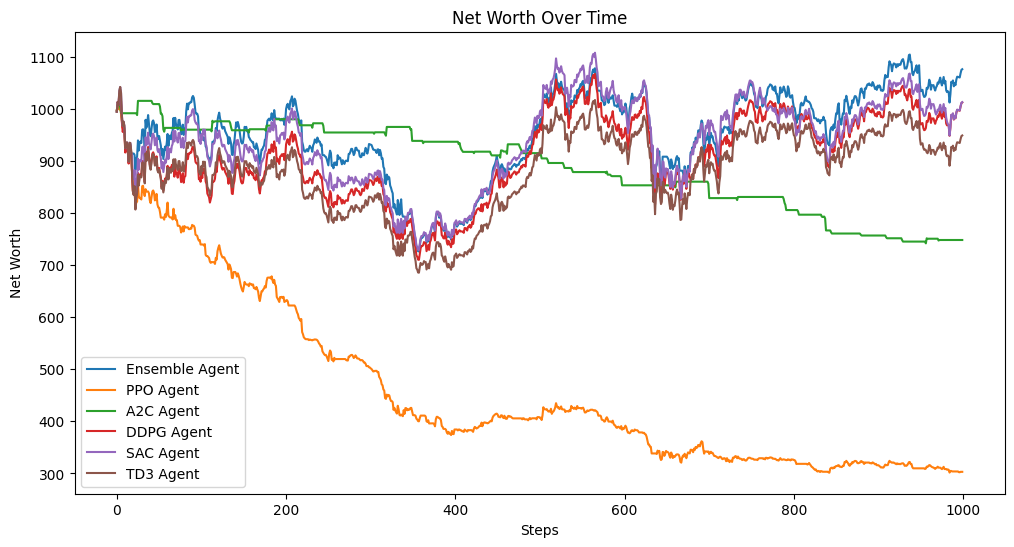

In [30]:
# 1. Create the environment and train the agents
training_length = len(["XOM"])
epochs=1
total_timesteps=100#epochs*training_length
env, ensemble_agent, ppo_agent, a2c_agent, ddpg_agent, sac_agent, td3_agent = create_env_and_train_agents(training_data, total_timesteps) #

# 2. Test & visualize the agents
n_tests = 1000
agents = {
    'Ensemble Agent': ensemble_agent,
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'SAC Agent': sac_agent,
    'TD3 Agent': td3_agent,
}
test_and_visualize_agents(env, agents, training_data, n_tests=n_tests)


# 7. Testing Model - Ensemble + PPO + A2C + DDPG

Testing PPO Agent...
Done testing PPO Agent!
Testing A2C Agent...
Done testing A2C Agent!
Testing DDPG Agent...
Done testing DDPG Agent!
Testing Ensemble Agent...
Done testing Ensemble Agent!
Testing SAC Agent...
Done testing SAC Agent!
Testing TD3 Agent...
Done testing TD3 Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


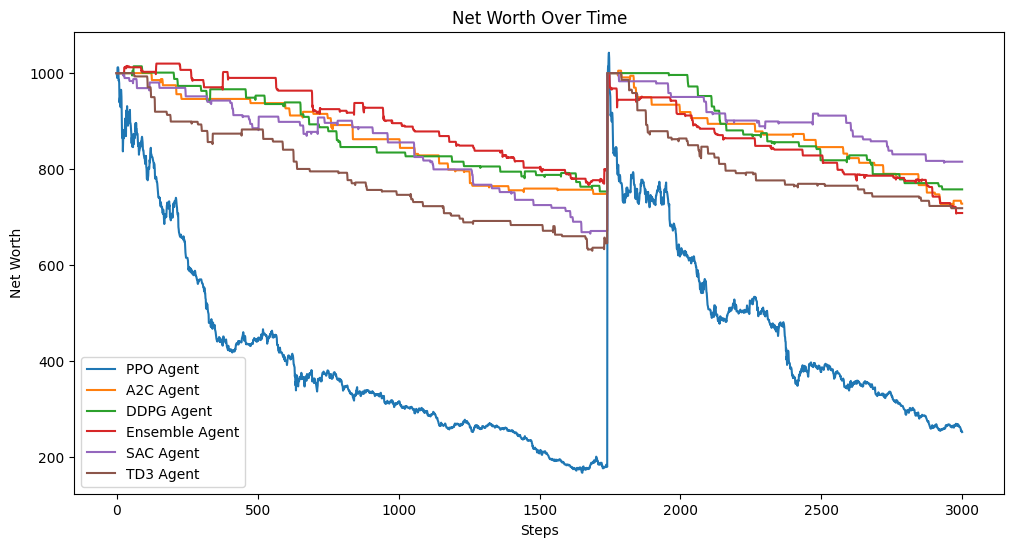

,Agent,Return,Standard Deviation,Sharpe Ratio
0,PPO Agent,0.000707,0.084595,0.008359
1,A2C Agent,-0.000022,0.011490,-0.001922
4,SAC Agent,-0.000059,0.010524,-0.005588
2,DDPG Agent,-0.000065,0.010686,-0.006071
5,TD3 Agent,-0.000070,0.011276,-0.006197
3,Ensemble Agent,-0.000072,0.009407,-0.007625


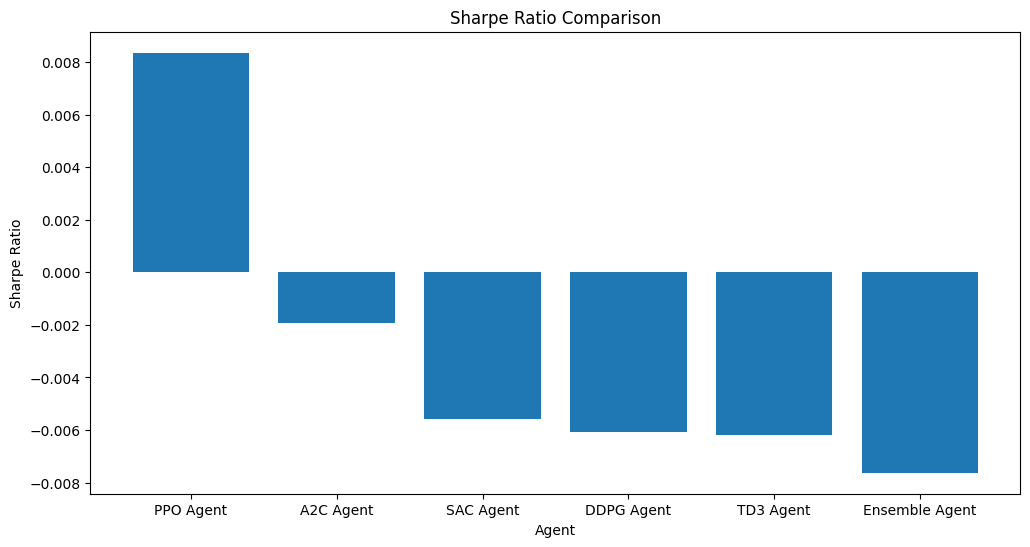

In [77]:
# Create the environment using DummyVecEnv with test data
test_env = DummyVecEnv([lambda: StockTradingEnv(test_data)])

# 2. Test & visualize the agents on the test data
n_tests = 3000
test_agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'Ensemble Agent': ensemble_agent,
    'SAC Agent': sac_agent,
    'TD3 Agent': td3_agent,
    'HER Agent': her_agent,
}
test_and_visualize_agents(env, test_agents, test_data, n_tests=n_tests)

# 3. Compare the agents' performance on the test data ( returns, standard deviation, and sharpe ratio )
test_agents_metrics = [test_agent(env, agent, test_data, n_tests=n_tests, visualize=False) for agent in test_agents.values()]
compare_and_plot_agents(test_agents_metrics, list(test_agents.keys()))

In [72]:
test_data["XOM"]["Close"]
test_data["XOM"]

,Open,High,Low,Close,Volume,MACD,Signal,RSI,CCI,ADX
Date,,,,,,,,,,
2017-01-31,85.040001,85.070000,83.129997,83.889999,19128100,-1.375811,-1.292896,39.171959,-127.861674,45.958728
2017-02-01,84.000000,84.160004,82.540001,82.940002,15111800,-1.484706,-1.331258,29.610121,-160.110316,43.789979
2017-02-02,83.209999,83.529999,82.550003,83.449997,12200100,-1.512420,-1.367491,34.837333,-153.801977,42.081047
2017-02-03,83.699997,83.720001,82.900002,83.540001,12746300,-1.509717,-1.395936,35.379803,-135.801428,44.498917
2017-02-06,83.550003,83.650002,82.930000,83.309998,9938200,-1.508743,-1.418497,27.066766,-129.114232,46.807713
...,...,...,...,...,...,...,...,...,...,...
2020-05-01,45.630001,46.389999,43.000000,43.139999,35399300,0.778427,0.196184,50.915224,57.962071,29.747686
2020-05-04,42.509998,44.939999,42.220001,44.880001,27465600,0.812305,0.319408,55.525486,45.700608,28.630934
2020-05-05,46.259998,47.150002,44.660000,44.830002,29276200,0.825603,0.420647,60.730148,103.888556,27.223452


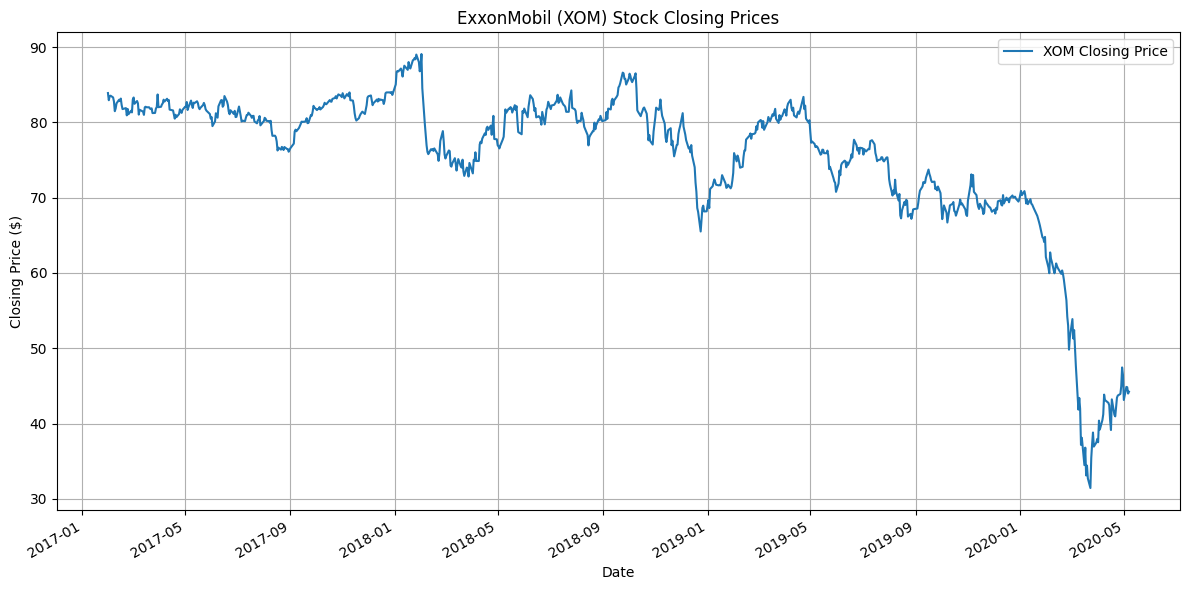

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

df=test_data["XOM"]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='XOM Closing Price')
plt.title('ExxonMobil (XOM) Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()

# Optionally, save the plot
# plt.savefig('xom_stock_price_plot.png')

# Now using Discrete Action to see how it affects performance

In [53]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd
import random

class StockTradingEnv(gym.Env):
    metadata = {'render_modes': ['human']}

    def __init__(self, stock_data, transaction_cost_percent=0.005):
        super(StockTradingEnv, self).__init__()

        # Remove any empty DataFrames
        self.stock_data = {ticker: df for ticker, df in stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())

        if not self.tickers:
            raise ValueError("All provided stock data is empty")

        # Calculate the size of one stock's data
        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)

        # Define action and observation space
        self.action_space = spaces.Discrete(3 * len(self.tickers))  # Discrete actions: 0 - hold, 1 - buy, 2 - sell for each ticker

        # Observation space: price data for each stock + balance + shares held + net worth + max net worth + current step
        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

        # Initialize account balance
        self.initial_balance = 1000
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}

        # Set the current step
        self.current_step = 0

        # Calculate the minimum length of data across all stocks
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

        # Transaction cost
        self.transaction_cost_percent = transaction_cost_percent

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        self.current_step = 0
        return self._next_observation(), {}

    def _next_observation(self):
        # Initialize the frame
        frame = np.zeros(self.obs_shape)

        # Add stock data for each ticker
        idx = 0
        for ticker in self.tickers:
            df = self.stock_data[ticker]
            if self.current_step < len(df):
                frame[idx:idx+self.n_features] = df.iloc[self.current_step].values
            else:
                frame[idx:idx+self.n_features] = df.iloc[-1].values
            idx += self.n_features

        # Add balance, shares held, net worth, max net worth, and current step
        frame[-4-len(self.tickers)] = self.balance
        frame[-3-len(self.tickers):-3] = [self.shares_held[ticker] for ticker in self.tickers]
        frame[-3] = self.net_worth
        frame[-2] = self.max_net_worth
        frame[-1] = self.current_step

        return frame

    def step(self, action):
        self.current_step += 1

        previous_net_worth = self.net_worth

        if self.current_step > self.max_steps:
            return self._next_observation(), 0, True, False, {}

        current_prices = {}
        for ticker in self.tickers:
            current_prices[ticker] = self.stock_data[ticker].iloc[self.current_step]['Close']

        # Iterate over tickers and perform actions
        has_bought = False
        has_sold = False

        for i, ticker in enumerate(self.tickers):
            ticker_action = action % 3  # Map the discrete action to buy, hold, or sell
            action = action // 3

            if ticker_action == 1 and not has_bought:  # Buy
                shares_to_buy = int(self.balance / current_prices[ticker])
                cost = shares_to_buy * current_prices[ticker]
                transaction_cost = cost * self.transaction_cost_percent
                self.balance -= (cost + transaction_cost)
                self.shares_held[ticker] += shares_to_buy
                has_bought = True

            elif ticker_action == 2 and not has_sold:  # Sell
                shares_to_sell = self.shares_held[ticker]
                sale = shares_to_sell * current_prices[ticker]
                transaction_cost = sale * self.transaction_cost_percent
                self.balance += (sale - transaction_cost)
                self.shares_held[ticker] -= shares_to_sell
                self.total_shares_sold[ticker] += shares_to_sell
                self.total_sales_value[ticker] += sale
                has_sold = True

        self.net_worth = self.balance + sum(self.shares_held[ticker] * current_prices[ticker] for ticker in self.tickers)
        self.max_net_worth = max(self.net_worth, self.max_net_worth)
        
        # Calculate reward
        reward = self.net_worth - previous_net_worth

        done = self.net_worth <= 0 or self.current_step >= self.max_steps

        obs = self._next_observation()
        return obs, reward, done, False, {}

    def render(self, mode='human'):
        profit = self.net_worth - self.initial_balance
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance:.2f}')
        for ticker in self.tickers:
            print(f'{ticker} Shares held: {self.shares_held[ticker]}')
        print(f'Net worth: {self.net_worth:.2f}')
        print(f'Profit: {profit:.2f}')

    def close(self):
        pass

    def update_stock_data(self, new_stock_data, transaction_cost_percent=None):
        self.stock_data = {ticker: df for ticker, df in new_stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())

        if not self.tickers:
            raise ValueError("All new stock data are empty")

        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)

        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

        if transaction_cost_percent is not None:
            self.transaction_cost_percent = transaction_cost_percent

        self.reset()
        print(f"The environment has been updated with {len(self.tickers)} new stocks.")


In [60]:
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv

# Define DQN Agent
class DQNAgent:
    def __init__(self, env, total_timesteps):
        self.model = DQN("MlpPolicy", env, verbose=1, device='cuda')
        self.model.learn(total_timesteps=total_timesteps)

    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action
    


In [56]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to create the environment and train the agents
def create_env_and_train_agents(data, total_timesteps):
    # Create the environment using DummyVecEnv with training data
    env = DummyVecEnv([lambda: StockTradingEnv(data)])
    
    # Train DDPG Agent
    dqn_agent = DQNAgent(env, total_timesteps)

    return env, dqn_agent

In [66]:
len(training_data["XOM"])

1743

In [67]:
# 1. Create the environment and train the agents
training_length = len(training_data["XOM"])
epochs=1
total_timesteps=epochs*training_length
env, dqn_agent = create_env_and_train_agents(training_data, total_timesteps) #

# 2. Test & visualize the agents
n_tests = 1000
agents = {
    'DQN Agent': dqn_agent,
}
test_and_visualize_agents(env, agents, training_data, n_tests=n_tests)


Using cuda device


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn